# Data Classification
___ 
   By: Omar A.Sabri

 

### 1) Import Libraries 
here we are importing needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile,f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')

### 2) Reading Data

In [2]:
dataset=pd.read_csv('Student_performance_data _.csv')

In [3]:
dataset.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [4]:
dataset.tail()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0
2391,3392,16,1,0,2,17.819907,13,0,2,0,0,0,1,2.140014,1.0


### 3) Data information, preprocessing and visualization

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [6]:
dataset.shape

(2392, 15)

In [7]:
dataset.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [8]:
dataset.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

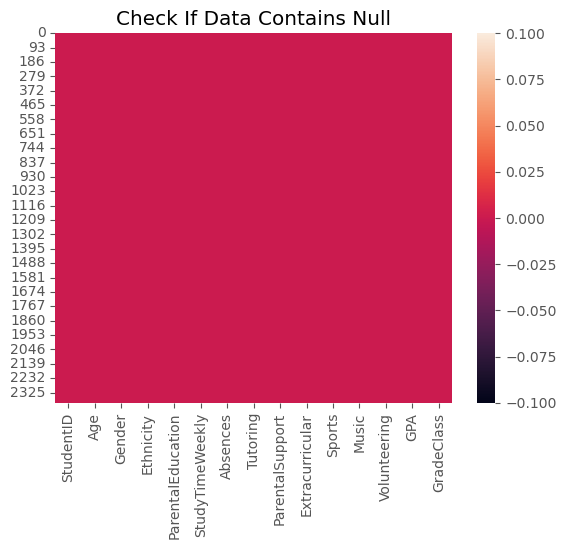

In [9]:
sns.heatmap(dataset.isnull())
plt.title("Check If Data Contains Null")
plt.show()

In [10]:
ValueCounts_Columns=['Age','Gender','Ethnicity','ParentalEducation','Absences','Tutoring','ParentalSupport',
                     'Extracurricular','Sports','Music','Volunteering','GradeClass']
for i in ValueCounts_Columns:
    #print(f"The value counts for '{i}'\n")
    print(dataset[i].value_counts())
    print("---------------------------")

Age
15    630
16    593
17    587
18    582
Name: count, dtype: int64
---------------------------
Gender
1    1222
0    1170
Name: count, dtype: int64
---------------------------
Ethnicity
0    1207
1     493
2     470
3     222
Name: count, dtype: int64
---------------------------
ParentalEducation
2    934
1    728
3    367
0    243
4    120
Name: count, dtype: int64
---------------------------
Absences
25    93
13    93
12    92
8     91
19    90
20    90
6     88
15    87
23    86
7     86
1     85
27    84
14    84
5     83
21    83
17    81
24    81
26    80
3     79
16    79
18    79
11    71
22    71
2     69
29    69
4     69
0     67
9     67
10    61
28    54
Name: count, dtype: int64
---------------------------
Tutoring
0    1671
1     721
Name: count, dtype: int64
---------------------------
ParentalSupport
2    740
3    697
1    489
4    254
0    212
Name: count, dtype: int64
---------------------------
Extracurricular
0    1475
1     917
Name: count, dtype: int64
-------

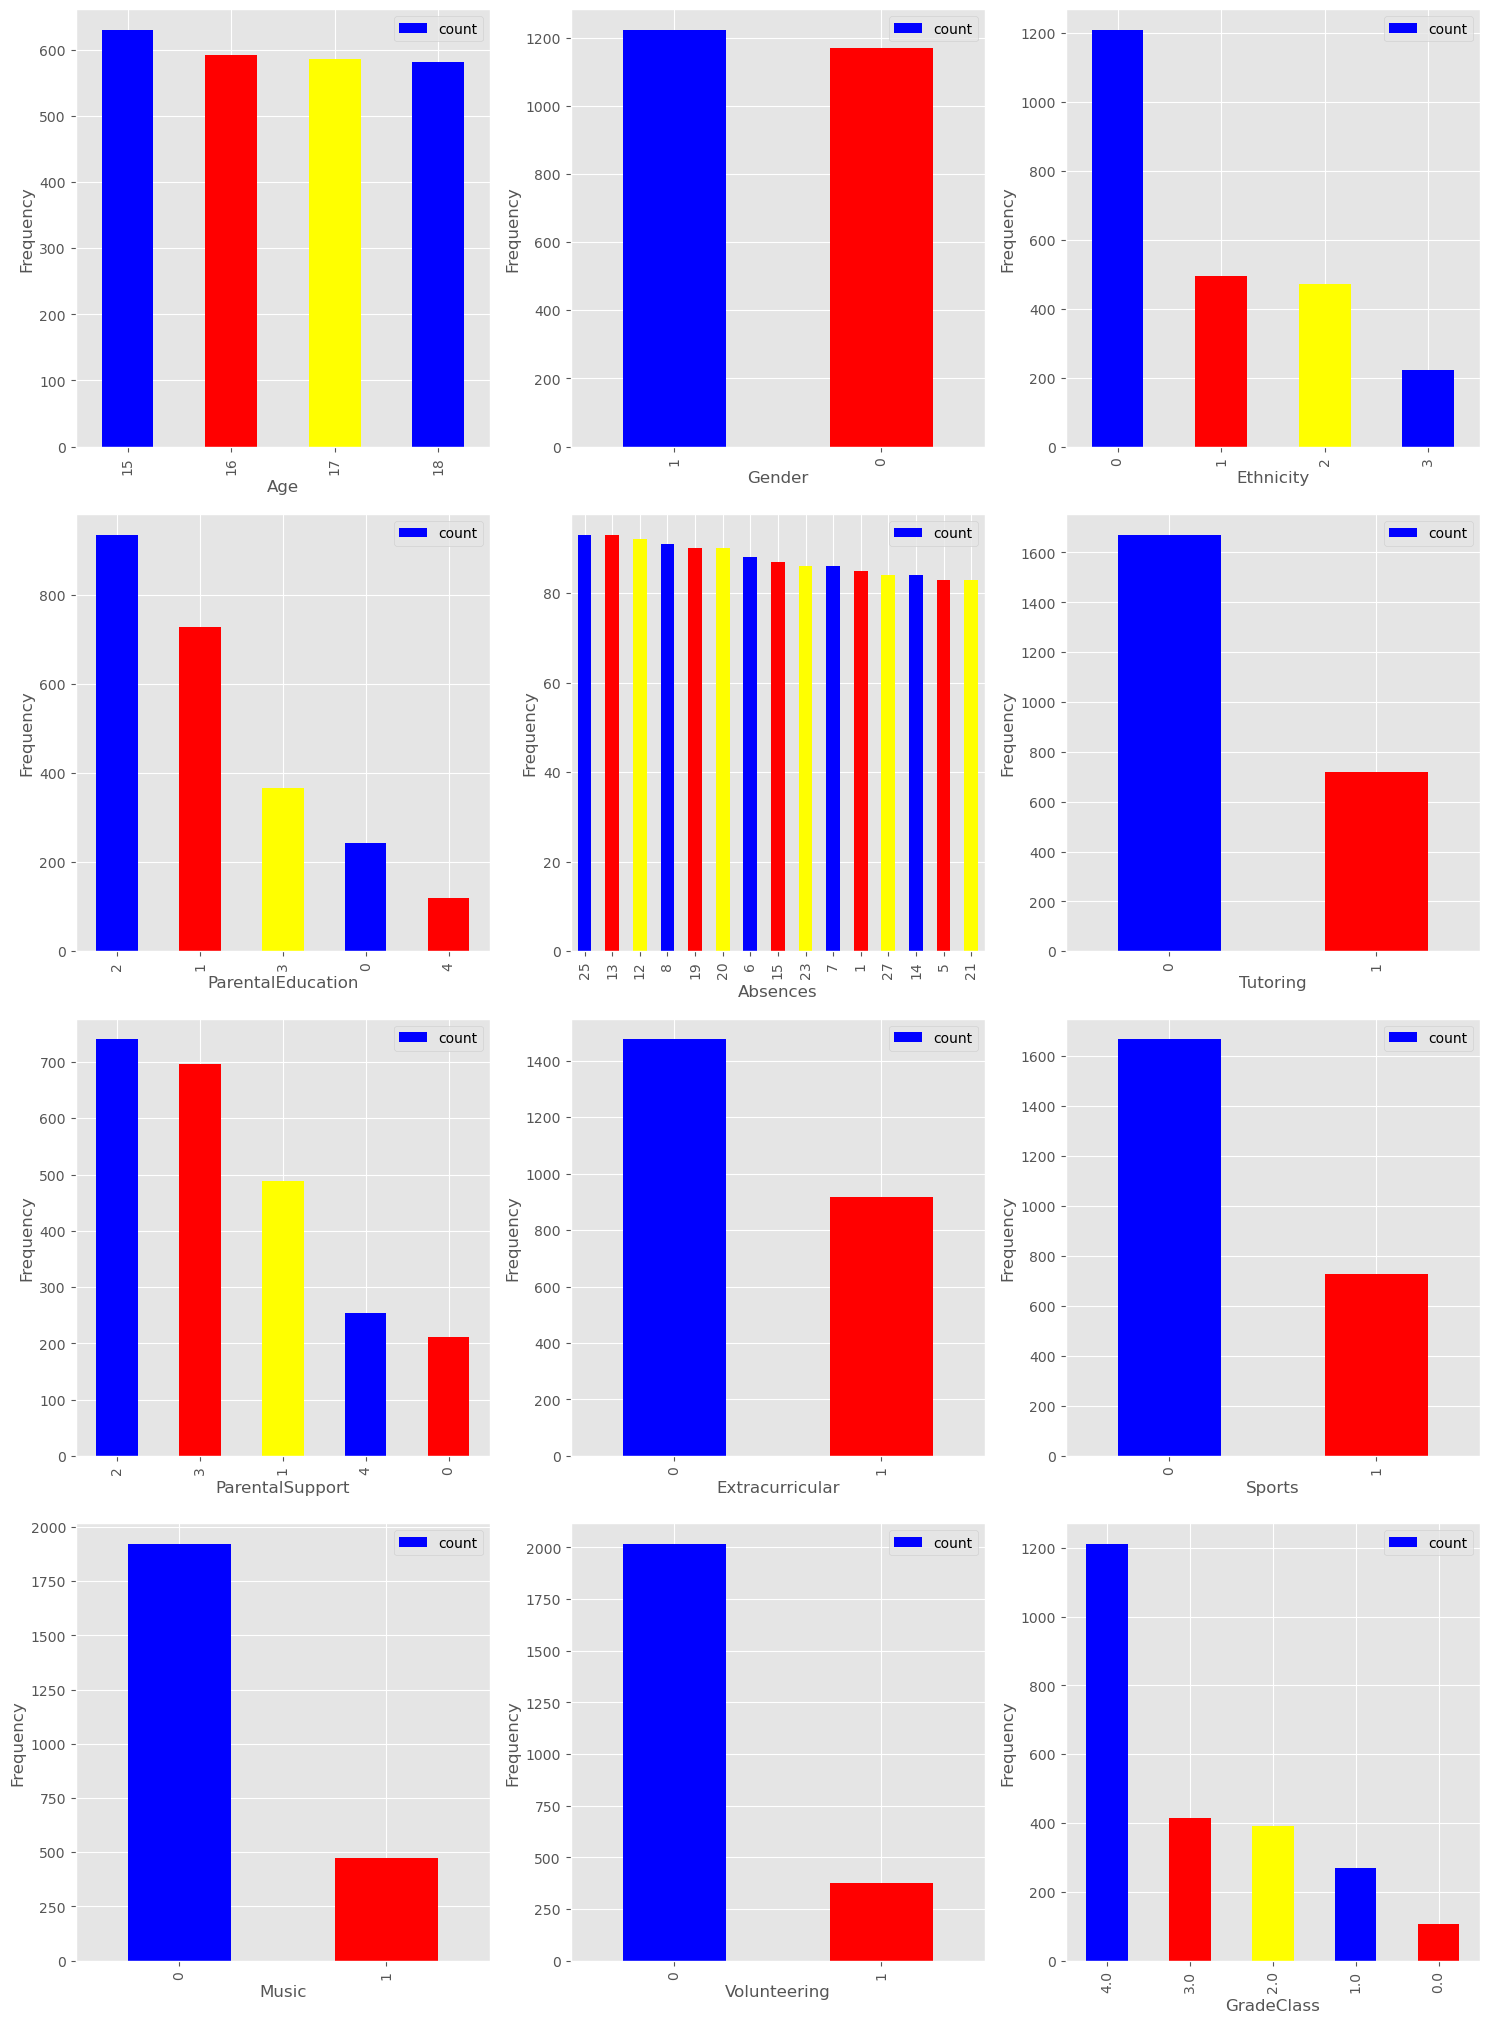

In [11]:
fig = plt.figure(figsize=(15,40))
for i in range(len(ValueCounts_Columns)):
    plt.subplot(8, 3, i+1)
    dataset[ValueCounts_Columns[i]].value_counts().head(15).plot(kind='bar', color=["blue","red","yellow"])
    plt.xlabel(ValueCounts_Columns[i])
    plt.ylabel("Frequency")
    plt.legend()
    plt.tight_layout()
plt.show()

#### Detect Outliers

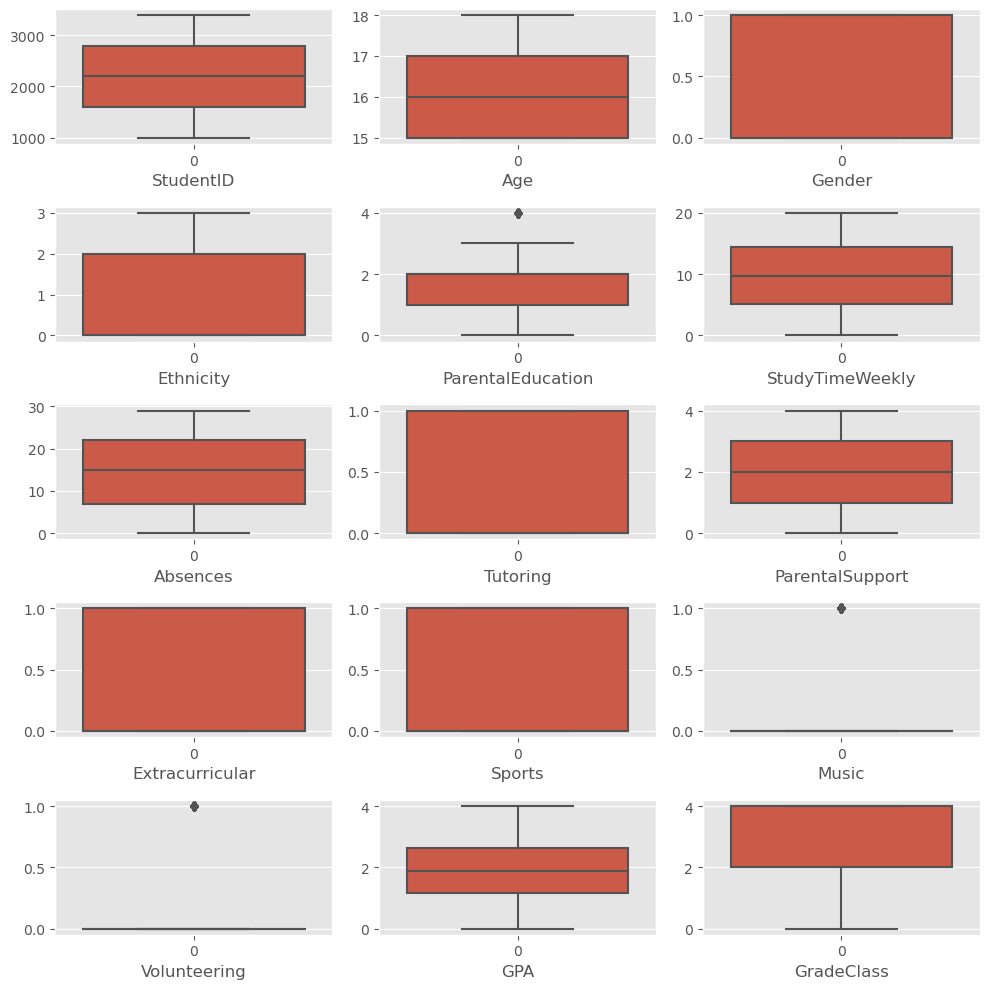

In [12]:
fig = plt.figure(figsize=(10,10))
for i in range(len(dataset.columns)):
    plt.subplot(5,3,i+1)
    sns.boxplot(dataset[dataset.columns[i]])
    plt.xlabel(dataset.columns[i])
    plt.tight_layout()

Distribution of Target variable

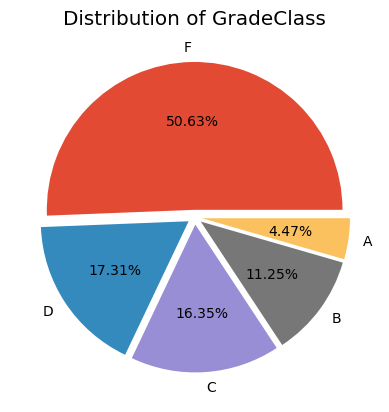

In [13]:
plt.pie(dataset["GradeClass"].value_counts(),labels=['F','D','C','B','A'],autopct ='%1.2f%%' , labeldistance = 1.1,
        explode = [0.05 for i in range(len(dataset["GradeClass"].value_counts()))])

plt.title('Distribution of GradeClass')
plt.show()

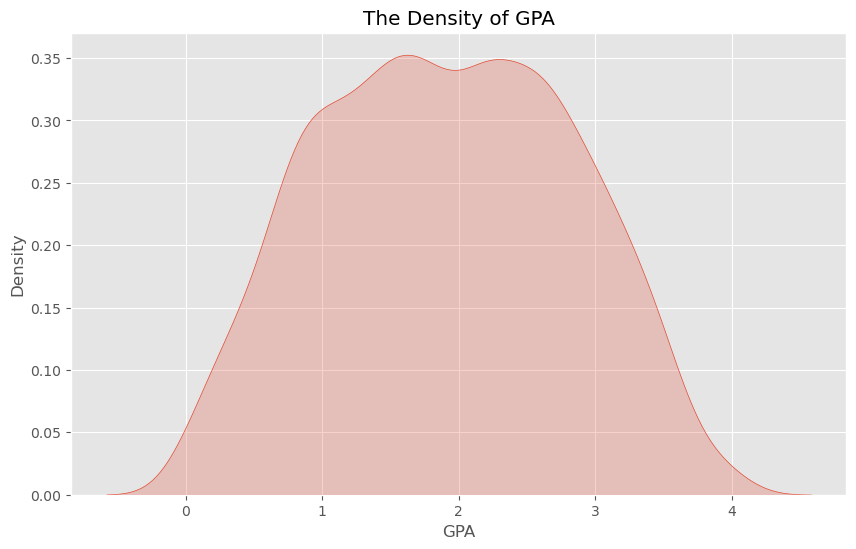

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
sns.kdeplot(dataset['GPA'], shade=True)
plt.title('The Density of GPA')
plt.show()

In [15]:
def RelKPlot(feature,Selectedfeature,FirstValue,SecondValue,ThirdValue,ForthValue,FifhValue) : 
    global dataset
    fig, ax = plt.subplots(figsize=(30,8))
    
    plt.subplot(1,6,1)
    plt.title('Total')
    Data = dataset
    sns.kdeplot(Data[feature], shade=True)   

    plt.subplot(1,6,2)
    plt.title('A')
    Data = dataset[dataset[Selectedfeature]==FirstValue]
    sns.kdeplot(Data[feature], shade=True)   

    plt.subplot(1,6,3)
    plt.title('B')
    Data = dataset[dataset[Selectedfeature]==SecondValue]
    sns.kdeplot(Data[feature], shade=True)
    
    plt.subplot(1,6,4)
    plt.title('C')
    Data = dataset[dataset[Selectedfeature]==ThirdValue]
    sns.kdeplot(Data[feature], shade=True)
    
    plt.subplot(1,6,5)
    plt.title('D')
    Data = dataset[dataset[Selectedfeature]==ForthValue]
    sns.kdeplot(Data[feature], shade=True)
    
    plt.subplot(1,6,6)
    plt.title('F')
    Data = dataset[dataset[Selectedfeature]==FifhValue]
    sns.kdeplot(Data[feature], shade=True)
    
    plt.show()  

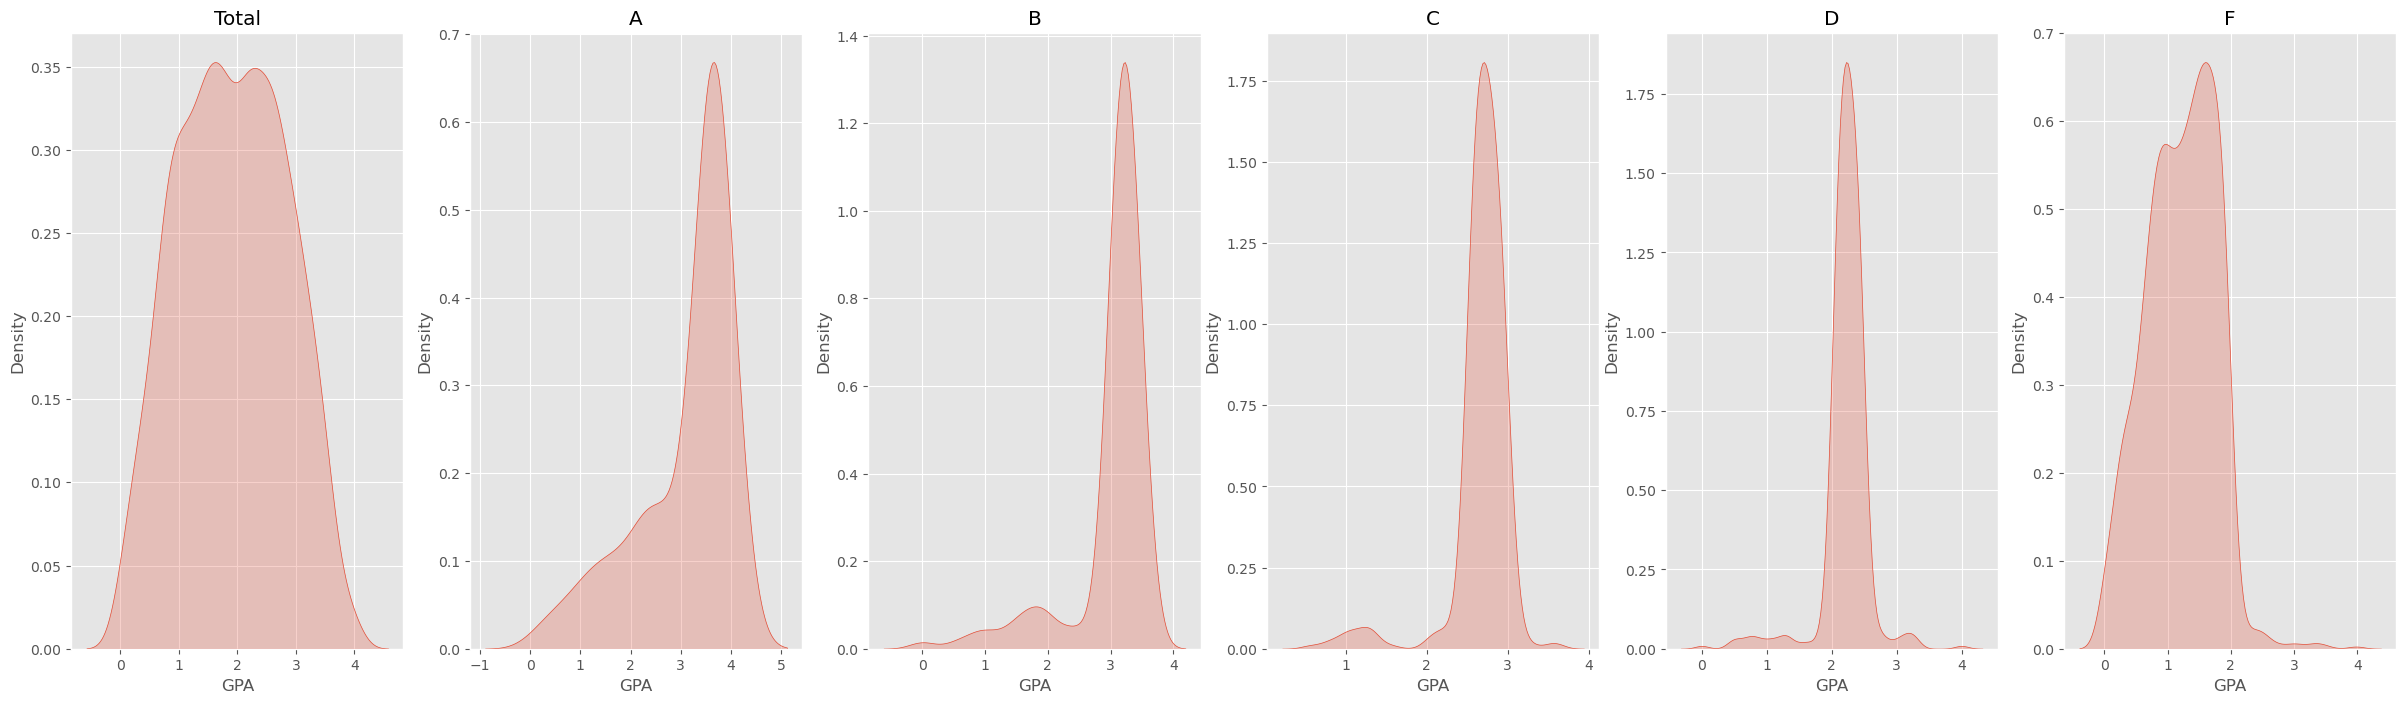

In [16]:
RelKPlot('GPA','GradeClass',0,1,2,3,4)

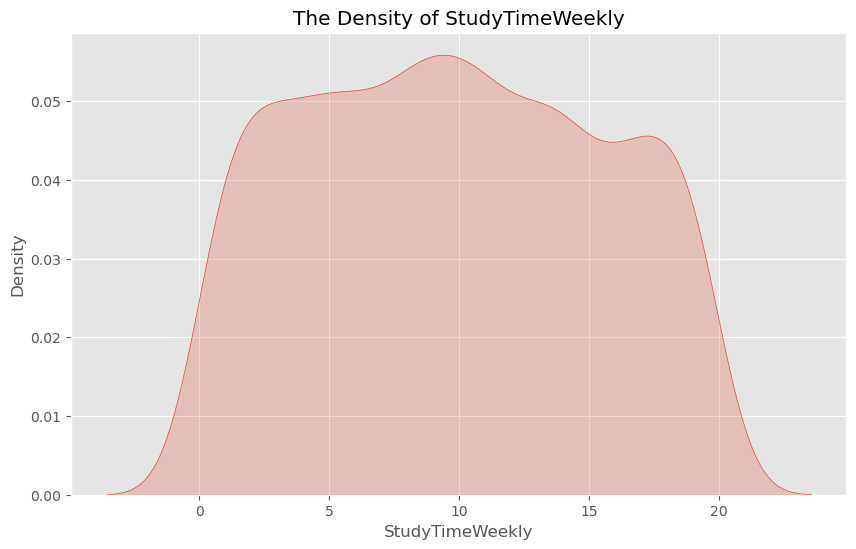

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
sns.kdeplot(dataset['StudyTimeWeekly'], shade=True)
plt.title('The Density of StudyTimeWeekly')
plt.show()

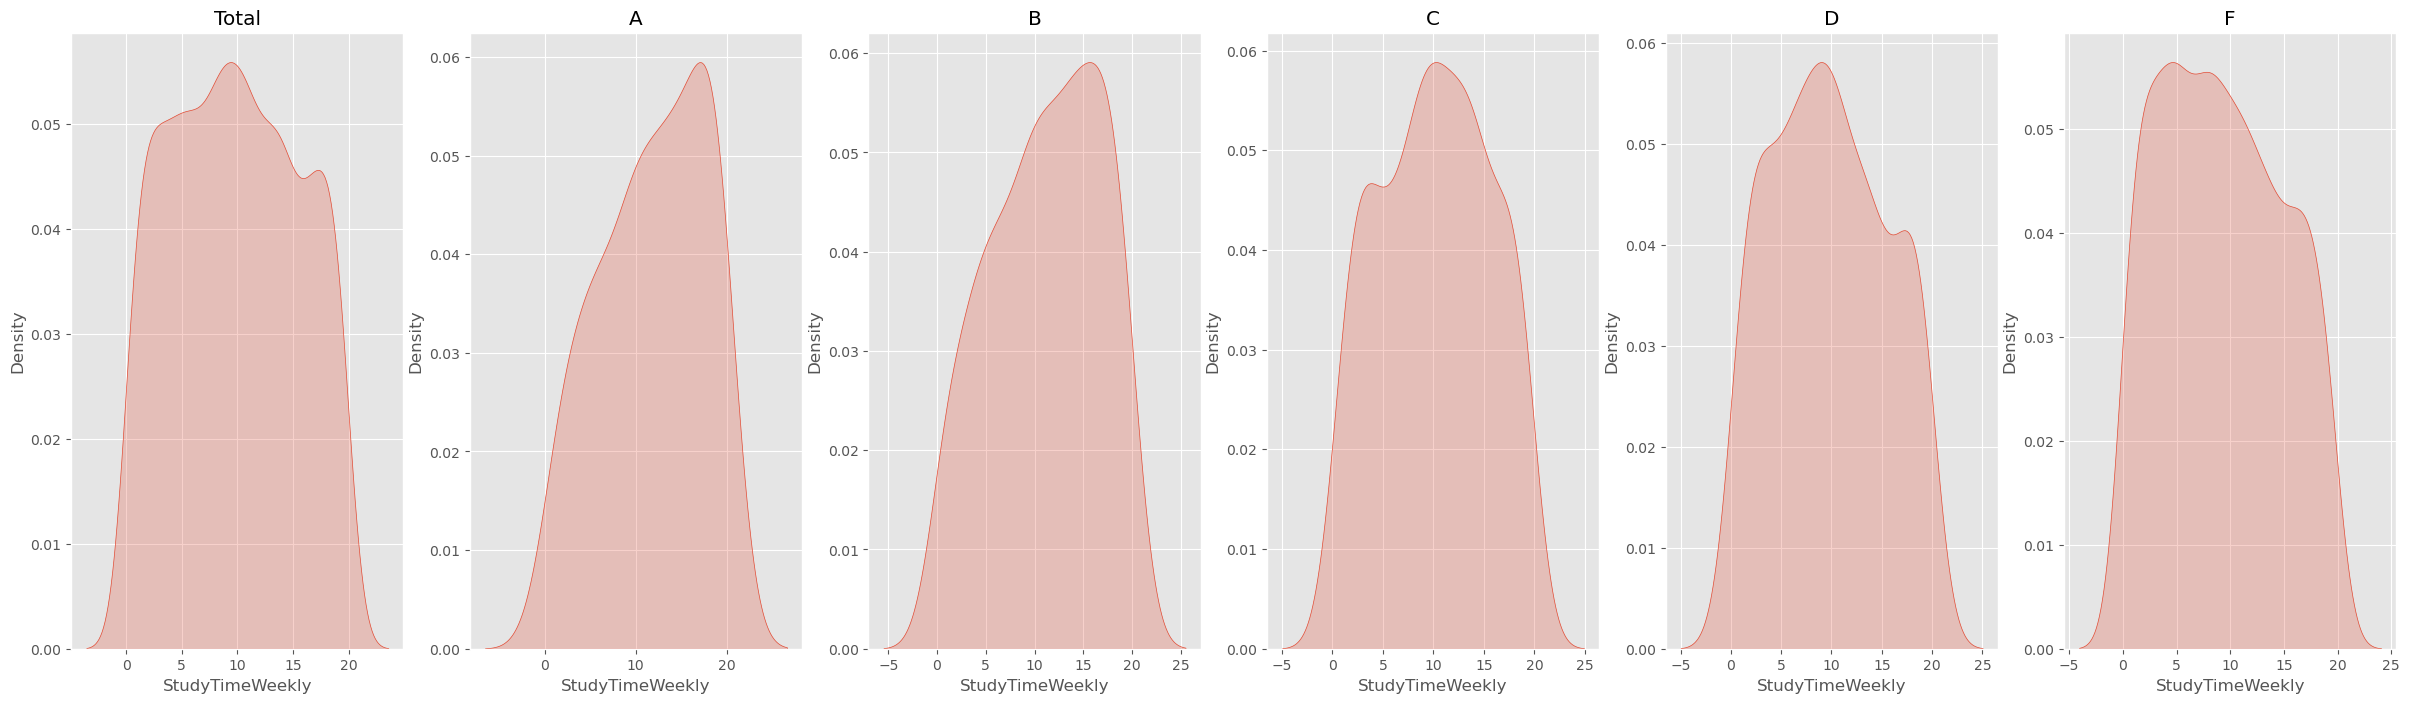

In [18]:
RelKPlot('StudyTimeWeekly','GradeClass',0,1,2,3,4)

In [19]:
def stacked_bar_chart(feature,target):
    crosstab = pd.crosstab(dataset[feature], dataset[target])
    #Stacked bar plot
    crosstab.plot(kind='bar', stacked=True)
    plt.title(f'Stacked Bar Chart of {feature} vs {target}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Count')
    plt.show()
    

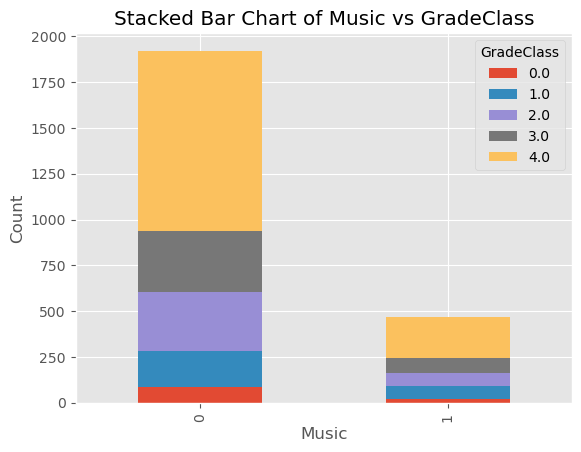

In [20]:
stacked_bar_chart('Music','GradeClass')

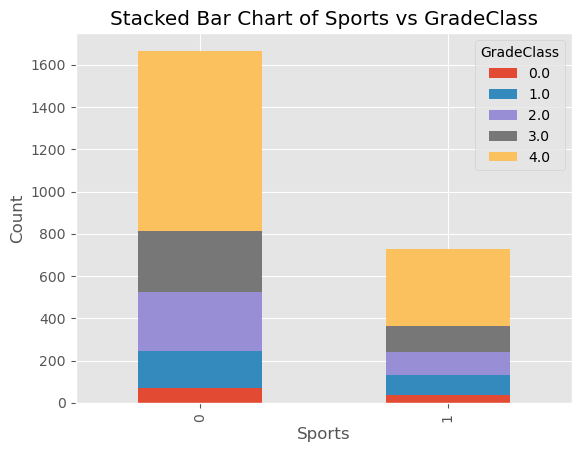

In [21]:
stacked_bar_chart('Sports','GradeClass')

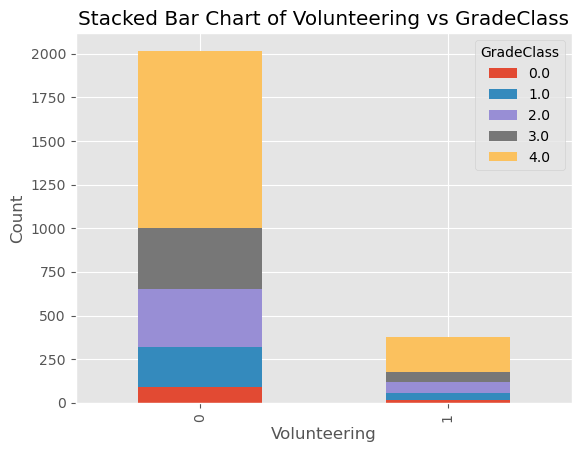

In [22]:
stacked_bar_chart('Volunteering','GradeClass')

In [23]:
'''
crosstab = pd.crosstab(dataset['Music'], dataset['GradeClass'])

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Feature vs Target')
plt.show()


'''

"\ncrosstab = pd.crosstab(dataset['Music'], dataset['GradeClass'])\n\n# Heatmap\nplt.figure(figsize=(10, 6))\nsns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')\nplt.title('Heatmap of Feature vs Target')\nplt.show()\n\n\n"

Identify correlation between features

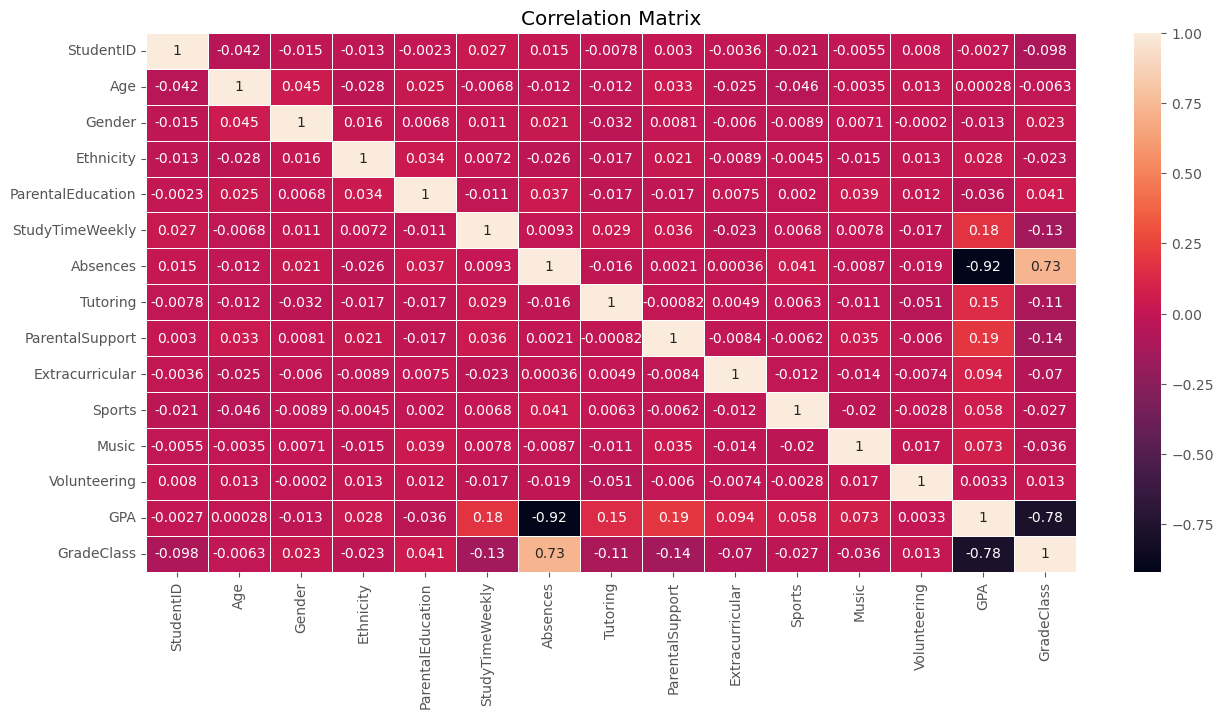

In [24]:
plt.figure(figsize=(15,7))
plt.title('Correlation Matrix')
sns.heatmap(dataset.select_dtypes(include='number').corr(),annot=True,linewidth=.5)
plt.show()

In [25]:
dataset = dataset.drop(columns=['StudentID'])

In [26]:
dataset

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [27]:
dataset.shape

(2392, 14)

# Split Data

In [28]:
X=dataset.drop(['GradeClass'],axis=1)
y=dataset['GradeClass'].values

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1602, 13)
(790, 13)
(1602,)
(790,)


# Feature Selection

In [31]:
print('Original X Shape is ' , X.shape)
FeatureSelection = SelectPercentile(score_func = f_classif , percentile=80) 
X_Selected = FeatureSelection.fit_transform(X, y)
NewData = pd.DataFrame(X_Selected,columns = [i for i,j in zip(X.columns,FeatureSelection.get_support()) if j])
NewData

Original X Shape is  (2392, 13)


,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,GPA
0,0.0,2.0,19.833723,7.0,1.0,2.0,0.0,0.0,1.0,2.929196
1,0.0,1.0,15.408756,0.0,0.0,1.0,0.0,0.0,0.0,3.042915
2,2.0,3.0,4.210570,26.0,0.0,2.0,0.0,0.0,0.0,0.112602
3,0.0,3.0,10.028829,14.0,0.0,3.0,1.0,0.0,0.0,2.054218
4,0.0,2.0,4.672495,17.0,1.0,3.0,0.0,0.0,0.0,1.288061
...,...,...,...,...,...,...,...,...,...,...
2387,0.0,3.0,10.680555,2.0,0.0,4.0,1.0,0.0,0.0,3.455509
2388,0.0,1.0,7.583217,4.0,1.0,4.0,0.0,1.0,0.0,3.279150
2389,0.0,2.0,6.805500,20.0,0.0,2.0,0.0,0.0,0.0,1.142333
2390,1.0,0.0,12.416653,17.0,0.0,2.0,0.0,1.0,1.0,1.803297


In [32]:
X=NewData

In [33]:
X

,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,GPA
0,0.0,2.0,19.833723,7.0,1.0,2.0,0.0,0.0,1.0,2.929196
1,0.0,1.0,15.408756,0.0,0.0,1.0,0.0,0.0,0.0,3.042915
2,2.0,3.0,4.210570,26.0,0.0,2.0,0.0,0.0,0.0,0.112602
3,0.0,3.0,10.028829,14.0,0.0,3.0,1.0,0.0,0.0,2.054218
4,0.0,2.0,4.672495,17.0,1.0,3.0,0.0,0.0,0.0,1.288061
...,...,...,...,...,...,...,...,...,...,...
2387,0.0,3.0,10.680555,2.0,0.0,4.0,1.0,0.0,0.0,3.455509
2388,0.0,1.0,7.583217,4.0,1.0,4.0,0.0,1.0,0.0,3.279150
2389,0.0,2.0,6.805500,20.0,0.0,2.0,0.0,0.0,0.0,1.142333
2390,1.0,0.0,12.416653,17.0,0.0,2.0,0.0,1.0,1.0,1.803297


# Build Model

### 1) LogisticRegression

In [34]:
LogisticRegressionModel = LogisticRegression(max_iter=10000,C=15.0)
LogisticRegressionModel.fit(X_train,y_train)

LogisticRegression(C=15.0, max_iter=10000)

In [35]:
y_pred = LogisticRegressionModel.predict(X_test)

In [36]:
print(y_pred[:10])

[4. 2. 4. 1. 4. 3. 4. 3. 3. 4.]


In [37]:
print(y_test[:10])

[4. 1. 2. 0. 4. 2. 3. 3. 3. 4.]


In [38]:
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))

LogisticRegressionModel Train Score is :  0.8096129837702871
LogisticRegressionModel Test Score is :  0.7544303797468355


In [39]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report for LogisticRegressionModel is : \n', ClassificationReport)
AccScoreLogisticRegressionModel = accuracy_score(y_test, y_pred)
print('Accuracy Score For LogisticRegressionModel is : ', AccScoreLogisticRegressionModel)

Classification Report for LogisticRegressionModel is : 
               precision    recall  f1-score   support

         0.0       0.29      0.11      0.16        35
         1.0       0.57      0.53      0.55        88
         2.0       0.60      0.68      0.64       130
         3.0       0.69      0.51      0.59       144
         4.0       0.87      0.97      0.92       393

    accuracy                           0.75       790
   macro avg       0.60      0.56      0.57       790
weighted avg       0.73      0.75      0.74       790

Accuracy Score For LogisticRegressionModel is :  0.7544303797468355


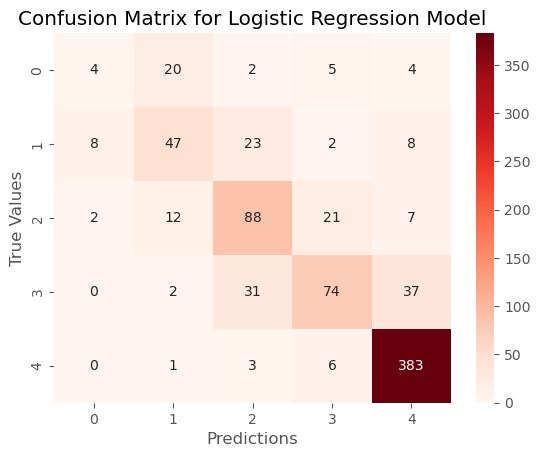

In [40]:
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM,fmt="d",cmap='Reds',annot=True)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

### 2) Support Vector Machine

In [81]:
SVCModel = SVC(kernel= 'linear',C=5.0,gamma='auto')
SVCModel.fit(X_train,y_train)

SVC(C=5.0, gamma=30, kernel='linear')

In [82]:
y_pred = SVCModel.predict(X_test)

In [83]:
print(y_pred[:10])

[4. 1. 4. 1. 4. 2. 4. 3. 3. 4.]


In [84]:
print(y_test[:10])

[4. 1. 2. 0. 4. 2. 3. 3. 3. 4.]


In [85]:
print('SupportVectorMachineModel Train Score is : ' , SVCModel.score(X_train, y_train))
print('SupportVectorMachineModel Test Score is : ' , SVCModel.score(X_test, y_test))

SupportVectorMachineModel Train Score is :  0.8701622971285893
SupportVectorMachineModel Test Score is :  0.8544303797468354


In [86]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report for SupportVectorMachineModel is : \n', ClassificationReport)
AccScoreSupportVectorMachineModel = accuracy_score(y_test, y_pred)
print('Accuracy Score For SupportVectorMachineModel is : ', AccScoreSupportVectorMachineModel)

Classification Report for SupportVectorMachineModel is : 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        35
         1.0       0.68      0.84      0.75        88
         2.0       0.83      0.82      0.82       130
         3.0       0.84      0.78      0.81       144
         4.0       0.91      0.97      0.94       393

    accuracy                           0.85       790
   macro avg       0.65      0.68      0.67       790
weighted avg       0.82      0.85      0.84       790

Accuracy Score For SupportVectorMachineModel is :  0.8544303797468354


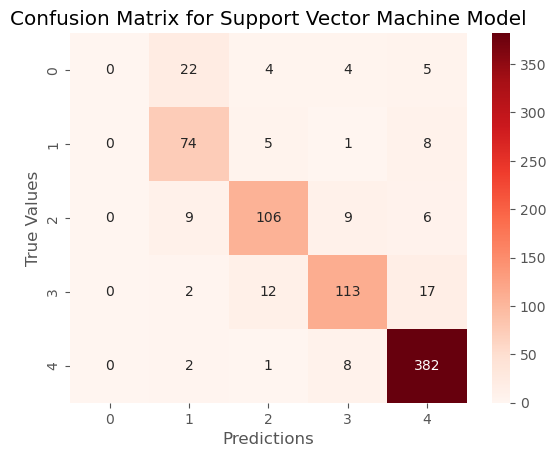

In [87]:
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM,fmt="d",cmap='Reds',annot=True)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.title('Confusion Matrix for Support Vector Machine Model')
plt.show()

### 3) DecisionTree 

In [116]:
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=33,min_samples_leaf=1)
DecisionTreeClassifierModel.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=33)

In [117]:
y_pred = DecisionTreeClassifierModel.predict(X_test)

In [118]:
print(y_pred[:10])

[4. 1. 3. 0. 4. 2. 3. 3. 3. 4.]


In [119]:
print(y_test[:10])

[4. 1. 2. 0. 4. 2. 3. 3. 3. 4.]


In [120]:
print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(X_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(X_test, y_test))

DecisionTreeClassifierModel Train Score is :  0.9338327091136079
DecisionTreeClassifierModel Test Score is :  0.9227848101265823


In [121]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report for DecisionTreeClassifierModel is : \n', ClassificationReport)
AccScoreDecisionTreeClassifierModel = accuracy_score(y_test, y_pred)
print('Accuracy Score For DecisionTreeClassifierModel is : ', AccScoreDecisionTreeClassifierModel)

Classification Report for DecisionTreeClassifierModel is : 
               precision    recall  f1-score   support

         0.0       0.84      0.60      0.70        35
         1.0       0.92      0.86      0.89        88
         2.0       0.93      0.89      0.91       130
         3.0       0.90      0.89      0.90       144
         4.0       0.93      0.99      0.96       393

    accuracy                           0.92       790
   macro avg       0.90      0.85      0.87       790
weighted avg       0.92      0.92      0.92       790

Accuracy Score For DecisionTreeClassifierModel is :  0.9227848101265823


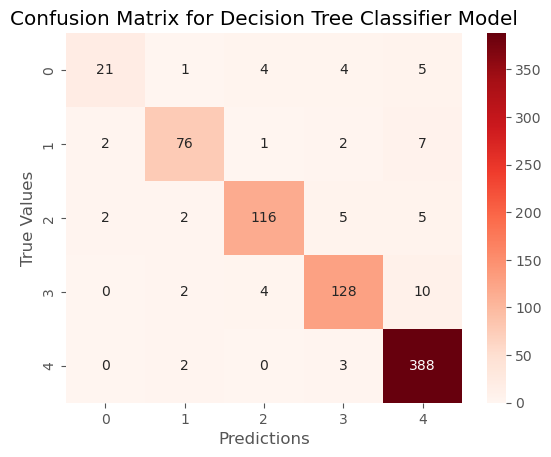

In [122]:
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM,fmt="d",cmap='Reds',annot=True)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.title('Confusion Matrix for Decision Tree Classifier Model')
plt.show()

### 4) Random Forest

In [123]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=8,random_state=33)
RandomForestClassifierModel.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, random_state=33)

In [124]:
y_pred = RandomForestClassifierModel.predict(X_test)

In [125]:
print(y_pred[:10])

[4. 1. 3. 0. 4. 2. 3. 3. 3. 4.]


In [126]:
print(y_test[:10])

[4. 1. 2. 0. 4. 2. 3. 3. 3. 4.]


In [127]:
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))

RandomForestClassifierModel Train Score is :  0.9400749063670412
RandomForestClassifierModel Test Score is :  0.9177215189873418


In [128]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report for RandomForestClassifierModel is : \n', ClassificationReport)
AccScoreRandomForestClassifierModel = accuracy_score(y_test, y_pred)
print('Accuracy Score For RandomForestClassifierModel is : ', AccScoreRandomForestClassifierModel)

Classification Report for RandomForestClassifierModel is : 
               precision    recall  f1-score   support

         0.0       0.84      0.46      0.59        35
         1.0       0.87      0.88      0.87        88
         2.0       0.93      0.89      0.91       130
         3.0       0.90      0.89      0.90       144
         4.0       0.93      0.99      0.96       393

    accuracy                           0.92       790
   macro avg       0.89      0.82      0.85       790
weighted avg       0.92      0.92      0.91       790

Accuracy Score For RandomForestClassifierModel is :  0.9177215189873418


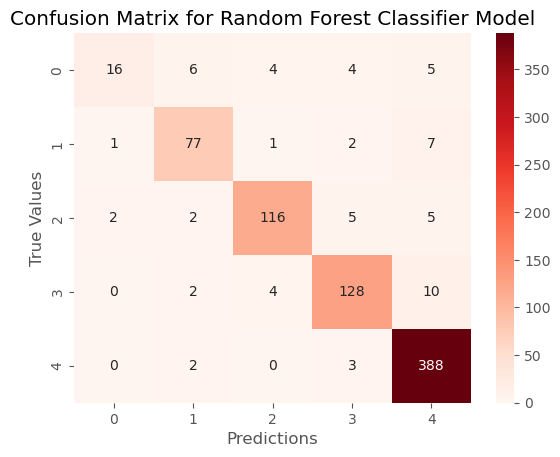

In [129]:
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM,fmt="d",cmap='Reds',annot=True)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.title('Confusion Matrix for Random Forest Classifier Model')
plt.show()

### 5) GradientBoosting

In [168]:
GBCModel = GradientBoostingClassifier(n_estimators=100,learning_rate=0.01,max_depth=4,random_state=33) 
GBCModel.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, random_state=33)

In [169]:
y_pred = GBCModel.predict(X_test)

In [170]:
print(y_pred[:10])

[4. 1. 3. 0. 4. 2. 4. 3. 3. 4.]


In [171]:
print(y_test[:10])

[4. 1. 2. 0. 4. 2. 3. 3. 3. 4.]


In [172]:
print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))

GBCModel Train Score is :  0.9382022471910112
GBCModel Test Score is :  0.9164556962025316


In [173]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report for GradientBoostingClassifier is : \n', ClassificationReport)
AccScoreGradientBoostingClassifierModel = accuracy_score(y_test, y_pred)
print('Accuracy Score For RandomForestClassifierModel is : ', AccScoreGradientBoostingClassifierModel)

Classification Report for GradientBoostingClassifier is : 
               precision    recall  f1-score   support

         0.0       0.80      0.57      0.67        35
         1.0       0.90      0.86      0.88        88
         2.0       0.93      0.89      0.91       130
         3.0       0.90      0.88      0.89       144
         4.0       0.93      0.98      0.95       393

    accuracy                           0.92       790
   macro avg       0.89      0.84      0.86       790
weighted avg       0.91      0.92      0.91       790

Accuracy Score For RandomForestClassifierModel is :  0.9164556962025316


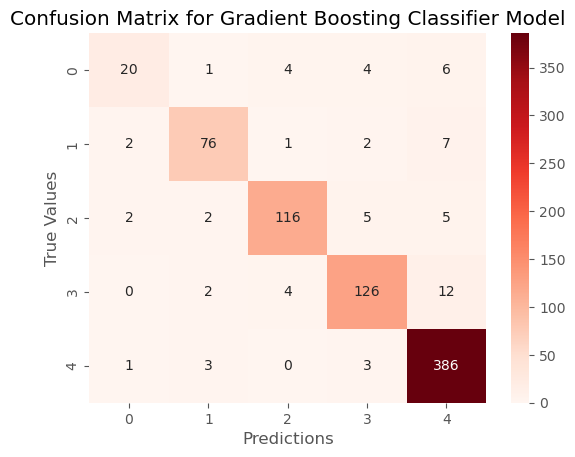

In [174]:
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM,fmt="d",cmap='Reds',annot=True)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.title('Confusion Matrix for Gradient Boosting Classifier Model')
plt.show()

# Comparison between Models

In [175]:
Models=["LogisticRegression","SupportVectorMachine","DecisionTreeClassifier","RandomForestClassifier",
        "GradientBoostingClassifier"]
AccuracyScore=[AccScoreLogisticRegressionModel,AccScoreSupportVectorMachineModel,AccScoreDecisionTreeClassifierModel,
                  AccScoreRandomForestClassifierModel,AccScoreGradientBoostingClassifierModel]

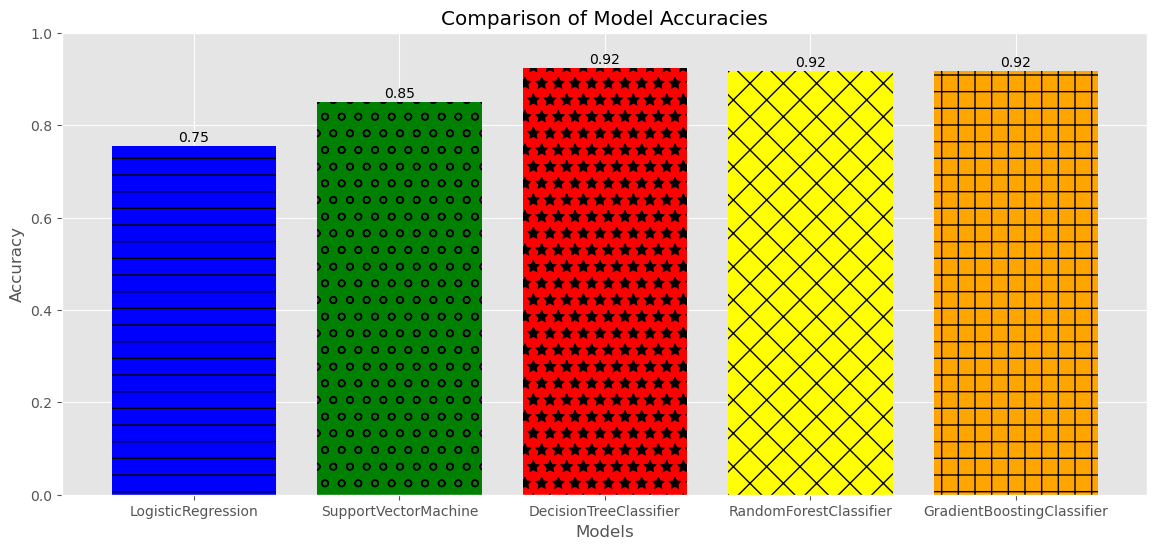

In [176]:
# Create the bar plot
plt.figure(figsize=(14, 6))
bars=plt.bar(Models,AccuracyScore, color=['blue', 'green', 'red','yellow','orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)# Ensure y-axis is from 0 to 1
bars[0].set_hatch('-')
bars[1].set_hatch('o')
bars[2].set_hatch('*')
bars[3].set_hatch('x')
bars[4].set_hatch('+')

# Display the accuracy score on top of each bar
for i, score in enumerate(AccuracyScore):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center')

plt.show()